在这本篇中，我们将学习蔗糖转化速率常数的测定。对于此篇，我们需要用到numpy、matplotlib.pyplot和matplotlib软件包。

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import rcParams
from scipy.interpolate import make_interp_spline
from scipy.optimize import curve_fit
np.set_printoptions(suppress=True)
from sympy import *
import math
config = {
    "font.family":'serif',             #设置字体家族
    "font.size": 12,                   #设置中文字体为宋体12号，英文字体为Times New Roman
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)

定义一个computeCorrelation(X, Y)函数，计算线性回归中的相关性以及R$^{2}$，以此来判断线性拟合的相关程度。

In [4]:
def computeCorrelation(X, Y):
    xBar = np.mean(X)
    yBar = np.mean(Y)
    SSR = 0
    varX = 0
    varY = 0
    for i in range(0, len(X)):
        diffXXBar = X[i] - xBar
        diffYYBar = Y[i] - yBar
        SSR += (diffXXBar * diffYYBar)
        varX += diffXXBar ** 2
        varY += diffYYBar ** 2

    SST = math.sqrt(varX * varY)
    print("r：", SSR / SST, "r-squared：", (SSR / SST) ** 2)
    return

print(matplotlib.matplotlib_fname())

c:\users\华硕\appdata\local\programs\python\python38\lib\site-packages\matplotlib\mpl-data\matplotlibrc


蔗糖水溶液在有氢离子存在时发生水解反应：

$$C_{12}H_{22}O_{11}(蔗糖) + H_{2}O  \rightarrow C_{6}H_{12}O_{6}(葡萄糖) + C_{6}H_{12}O_{6}(果糖)$$

其速率方程为：

$$-\frac{dc_{C_{12} H_{22} O_{11}}}{dt} = k_{2}c_{C_{12} H_{22} O_{11}}c_{H_{2}O}$$

当氢离子浓度一定，蔗糖溶液较稀时，因为作为溶剂的水的浓度可以认为基本不变，可以合并进常数项，这时蔗糖水解为假一级反应，其速率方程可写为:

$$-\frac{dc_{C_{12} H_{22} O_{11}}}{dt} = kc_{C_{12} H_{22} O_{11}}$$

令c$_{0}$为蔗糖开始的浓度，c$_{t}$为反应t时刻的蔗糖浓度，将上式积分可得到:

$$ln\frac{c_{0}}{c_{t}} = kt$$

只要Inc$_{t}$对t作图得到直线关系，就可证明蔗糖稀溶液的水解为一级反应，并可从直线的斜率求得速率常数k。
当反应物浓度由c$_{0}$降至c=$-\frac{1}{2}$c$_{0}$时，所用时间称为反应的半衰期，用t$_{1/2}$表示: 

$$t_{1/2} = \frac{ln2}{k}$$

随着反应的进行，蔗糖的浓度逐渐降低至水解完全，即c$_{∞}$=0，葡萄糖和果糖的浓度逐渐增大，且果糖的左旋程度远大于葡萄糖的右旋程度，所以在水解过程中，溶液的旋光方向将逐渐由右旋变为左旋。
因为：

$$ɑ = ɑ_{蔗糖} + ɑ_{葡萄糖} + ɑ_{果糖}$$

设ɑ$_{0}$为t=0时溶液的旋光度，ɑ$_{t}$为时间t时混合溶液的旋光度,ɑ$_{∞}$为水解完全时溶液的旋光度，则：

$$ɑ_{t} = K_{蔗糖}(c_{0} + K_{葡萄糖}(c_{0}-c_{t}) + K_{蔗糖}(c_{0}-c_{t})$$

$$ɑ_{0} = K_{蔗糖}c_{0}$$

$$ɑ_{0} = K_{葡萄糖}c_{0} + K_{果糖}c_{0}$$

联立上面三式，消去K，得：

$$\frac{c_{0}}{c_{t}} = \frac{(ɑ_{0}-ɑ_{∞})}{(ɑ_{t}-ɑ_{∞})}$$

将上式代入即得：

$$k = \frac{1}{t}In(\frac{ɑ_{0}-ɑ_{∞}}{ɑ_{t}-ɑ_{∞}})$$

$$In(ɑ_{t}-ɑ_{∞}) = -kt + ln(ɑ_{0}-ɑ_{∞})$$

In(ɑ$_{t}$-ɑ$_{∞}$)对t作图得一直线，由直线的斜率即可算出反应速率常数k。

输入实验数据，并处理实验数据。

In [11]:
t = [5,10,15,20,30,40,50,60]

a = [11.20,10.50,9.85,9.20,8.10,6.95,6.05,5.15]
a = np.array(a)
a = a + 2.85
print('a修正')
print(a)

ai = [-4.60]
ai = np.array(ai)
a1 = a - ai
print('at-ainfty')
print(a1)
a2 = np.log(a1)
print('ln')
print(a2)

A = np.polyfit(t,a2,1)
B = np.poly1d(A)
print('图像的拟合函数：')
print(B)
D = B.deriv()
print('求导之后得到斜率：')
print(D)
computeCorrelation(t, a2)

a修正
[14.05 13.35 12.7  12.05 10.95  9.8   8.9   8.  ]
at-a\infty
[18.65 17.95 17.3  16.65 15.55 14.4  13.5  12.6 ]
ln
[2.92584615 2.88759011 2.8507065  2.81241022 2.74406064 2.66722821
 2.60268969 2.53369681]
图像的拟合函数：
 
-0.007129 x + 2.958
求导之后得到斜率：
 
-0.007129
r： -0.999760168751737 r-squared： 0.9995203950225017


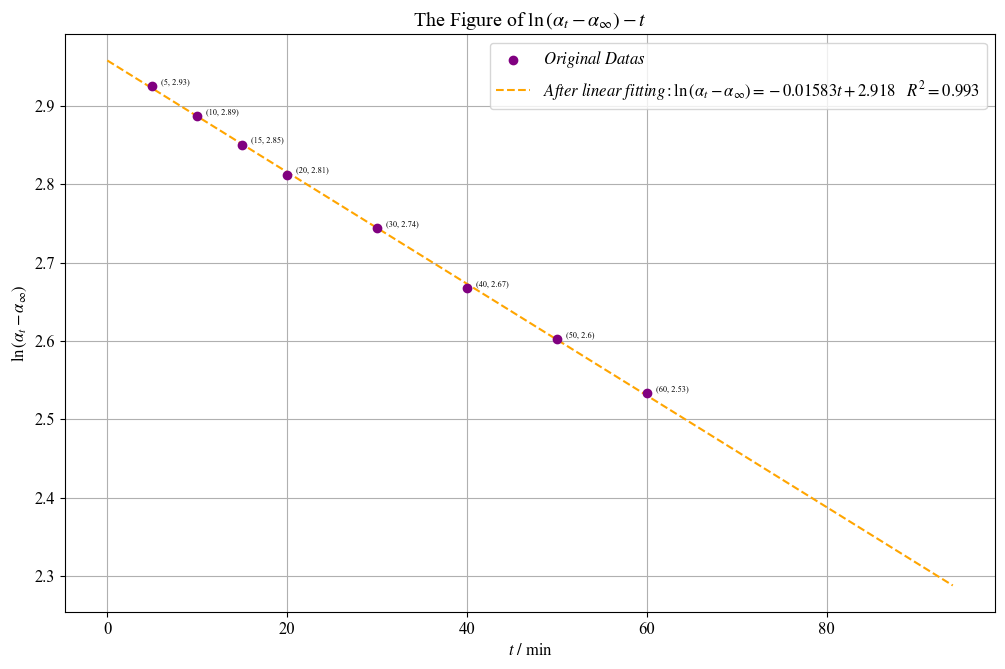

In [8]:
def runplt(size=None):
    plt.figure(figsize=(12,7.5))
    plt.title(r'The Figure of $\ln{(\alpha_{t} - \alpha_{\infty})}-t$')
    plt.xlabel(r'$t \  / \ \rm{min}$')
    plt.ylabel(r'$\ln{(\alpha_{t} - \alpha_{\infty})}$')
    # plt.axis([0, 4.5,0.03, 0.07])
    # plt.axis([])
    return plt

plt=runplt()
plt.grid(zorder=0)
plt.scatter(t,a2,c='purple',marker='o',label='$Original \ Datas$',zorder=3)
plt.plot(np.arange(0,95,1),B(np.arange(0,95,1)),ls='--',c='orange',label=r'$After \ linear \ fitting:\ln{(\alpha_{t} - \alpha_{\infty})} =-0.01583t + 2.918\quad R^{2} = 0.993$',zorder=2)
for X, y in zip(t, a2):
    plt.text(X+1, y, (X,np.around(y,2)),ha='left', va='bottom', fontsize=6)
plt.legend(loc='upper right')
plt.savefig('ffigg.pdf',bbox_inches='tight')
plt.show()